In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
df.size

8000

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df[['math score','reading score','writing score']]=df[['math score','reading score','writing score']].astype('float64')

In [10]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

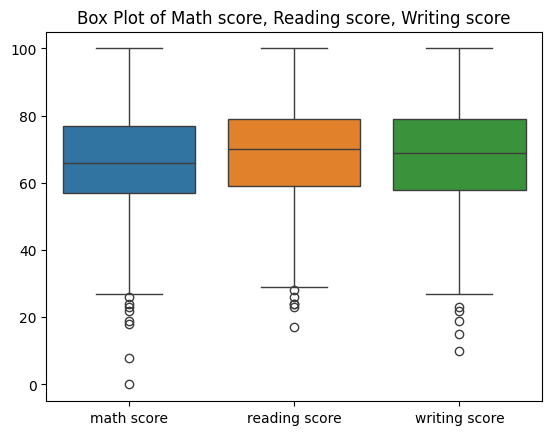

In [11]:
sns.boxplot(df[['math score','reading score','writing score']])
plt.title('Box Plot of Math score, Reading score, Writing score')
plt.show()

In [12]:
Q1=df[['math score','reading score','writing score']].quantile(0.25)
Q3=df[['math score','reading score','writing score']].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
outliers=df[((df[['math score','reading score','writing score']]<lb) | (df[['math score','reading score','writing score']]>ub))]
print(outliers)

    gender race/ethnicity parental level of education lunch  \
0      NaN            NaN                         NaN   NaN   
1      NaN            NaN                         NaN   NaN   
2      NaN            NaN                         NaN   NaN   
3      NaN            NaN                         NaN   NaN   
4      NaN            NaN                         NaN   NaN   
..     ...            ...                         ...   ...   
995    NaN            NaN                         NaN   NaN   
996    NaN            NaN                         NaN   NaN   
997    NaN            NaN                         NaN   NaN   
998    NaN            NaN                         NaN   NaN   
999    NaN            NaN                         NaN   NaN   

    test preparation course  math score  reading score  writing score  
0                       NaN         NaN            NaN            NaN  
1                       NaN         NaN            NaN            NaN  
2                       NaN

In [13]:
df=df[((df[['math score','reading score','writing score']]>lb) & (df[['math score','reading score','writing score']]<ub))]

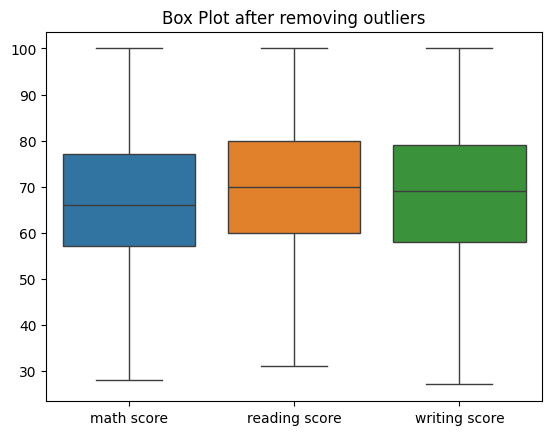

In [14]:
sns.boxplot(df[['math score','reading score','writing score']])
plt.title('Box Plot after removing outliers')
plt.show()

In [15]:
df_minmax=(df[['math score','reading score','writing score']]-df[['math score','reading score','writing score']].min())/(df[['math score','reading score','writing score']].max()-df[['math score','reading score','writing score']].min())

In [16]:
print(df_minmax)

     math score  reading score  writing score
0      0.611111       0.594203       0.643836
1      0.569444       0.855072       0.835616
2      0.861111       0.927536       0.904110
3      0.263889       0.376812       0.232877
4      0.666667       0.681159       0.657534
..          ...            ...            ...
995    0.833333       0.985507       0.931507
996    0.472222       0.347826       0.383562
997    0.430556       0.579710       0.520548
998    0.555556       0.681159       0.684932
999    0.680556       0.797101       0.808219

[1000 rows x 3 columns]


In [17]:
df_z=(df[['math score','reading score','writing score']]-df[['math score','reading score','writing score']].mean())/(df[['math score','reading score','writing score']].std())

In [18]:
print(df_z)

     math score  reading score  writing score
0      0.376014       0.175479       0.384565
1      0.168630       1.451794       1.330195
2      1.620315       1.806326       1.667919
3     -1.352182      -0.888117      -1.641784
4      0.652525       0.600917       0.452110
..          ...            ...            ...
995    1.482059       2.089952       1.803009
996   -0.315265      -1.029930      -0.898789
997   -0.522648       0.104573      -0.223340
998    0.099502       0.600917       0.587200
999    0.721653       1.168169       1.195105

[1000 rows x 3 columns]


-0.04619025513163576

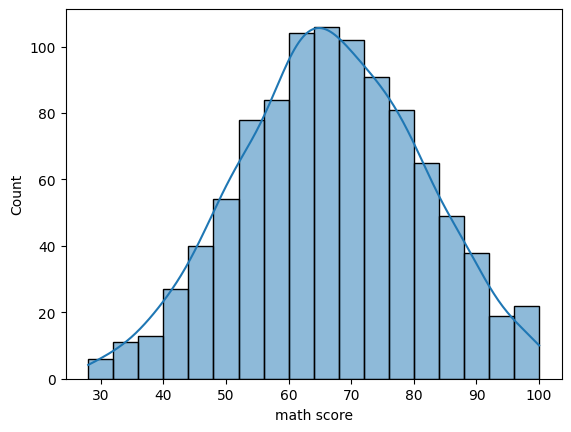

In [19]:
sns.histplot(df['math score'],kde=True)
df['math score'].skew()

-0.11177771461583844

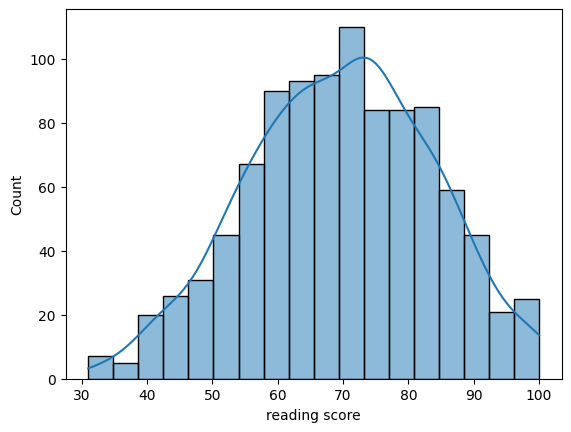

In [20]:
sns.histplot(df['reading score'],kde=True)
df['reading score'].skew()

-0.16323533564408832

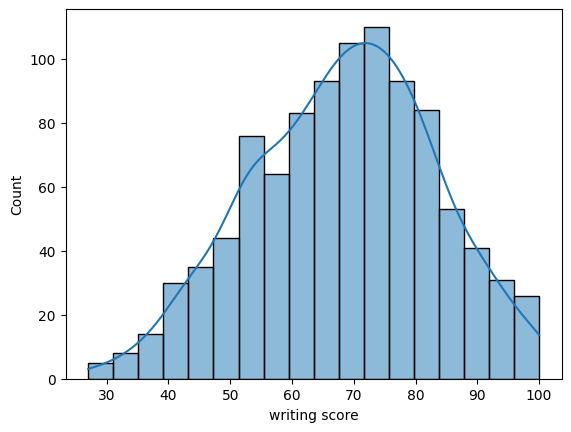

In [21]:
sns.histplot(df['writing score'],kde=True)
df['writing score'].skew()

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

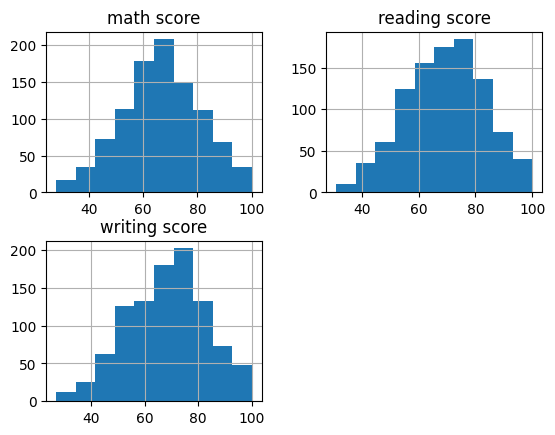

In [22]:
df.hist()

-0.4530990903570119

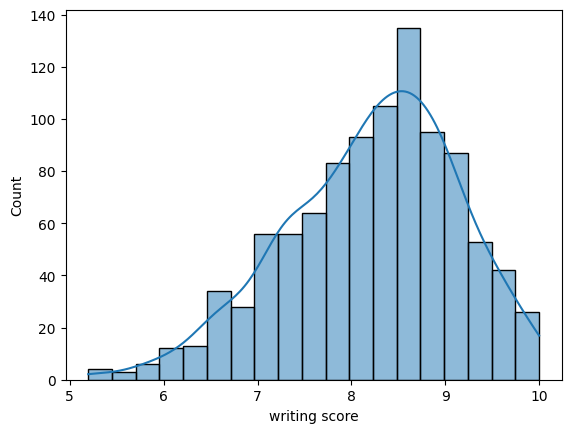

In [23]:
df['writing score']=np.sqrt(df['writing score'])
sns.histplot(df['writing score'],kde=True)
df['writing score'].skew()

<Axes: >

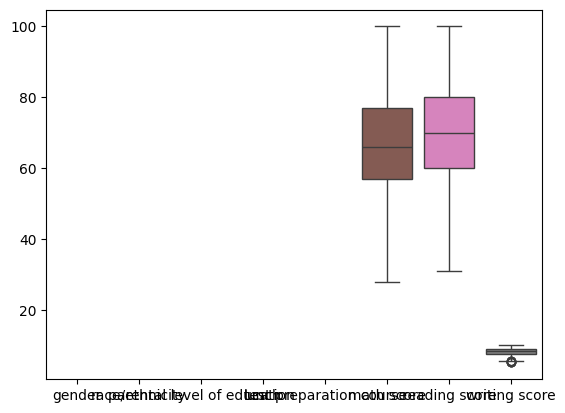

In [24]:
sns.boxplot(df)

<Axes: >

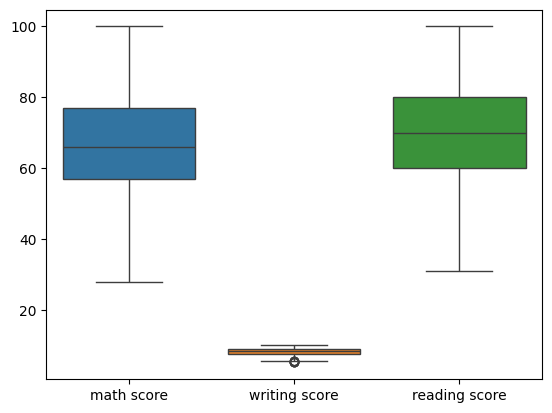

In [25]:
sns.boxplot(df[['math score','writing score','reading score']])